In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#create path
path = r'C:\Users\jacob\Documents\Data Analytics\Data Immersion\Achievement 4\10-2023 Instacart Basket Analysis'

In [3]:
#import orders_products_merged.pkl data
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged.pkl'))

### Bar Charts

<Axes: xlabel='day_of_week'>

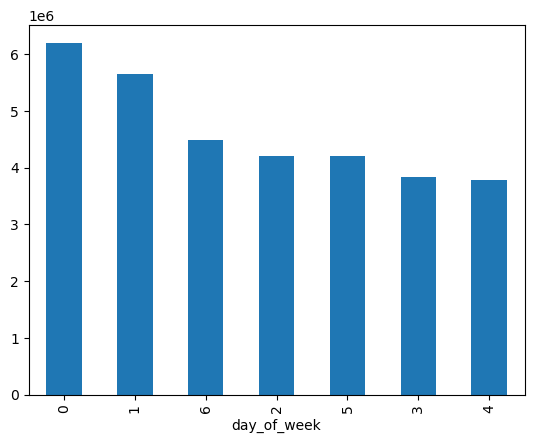

In [4]:
#create a bar chart
df['day_of_week'].value_counts().plot.bar()

<Axes: xlabel='day_of_week'>

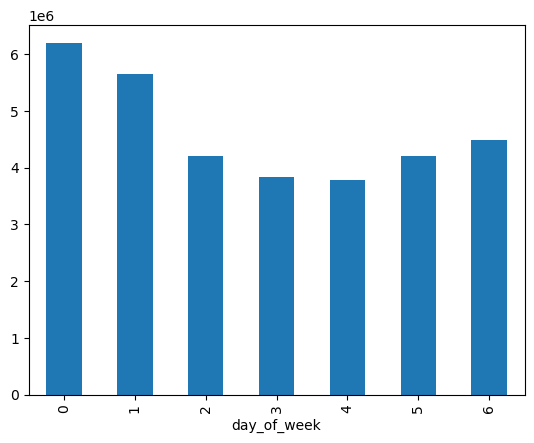

In [5]:
#create a bar chart with a sorted index
df['day_of_week'].value_counts().sort_index().plot.bar()

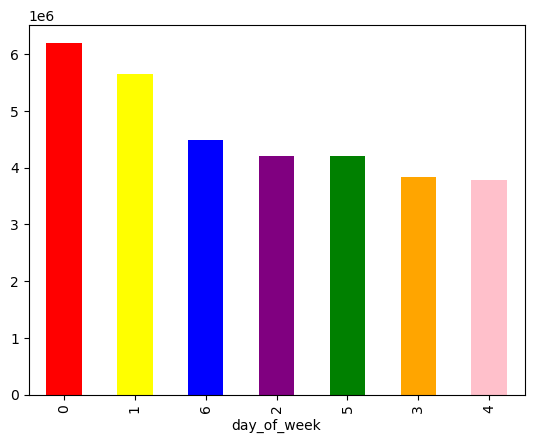

In [6]:
#bar chart with color
bar = df['day_of_week'].value_counts().plot.bar(color = ['red', 'yellow', 'blue', 'purple', 'green', 'orange', 'pink'])

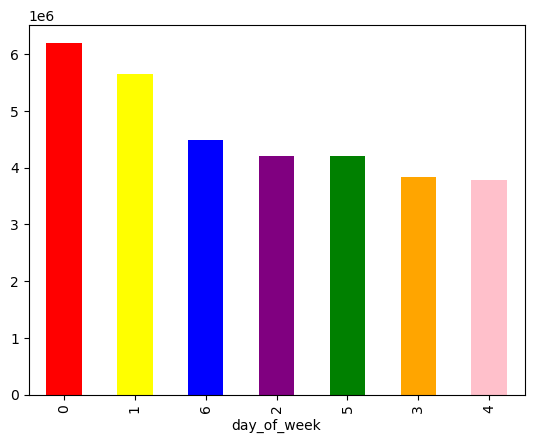

In [7]:
#check output
bar.figure

### Exporting charts

In [8]:
#export chart
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_day_of_week.png'))

### Histograms

<Axes: ylabel='Frequency'>

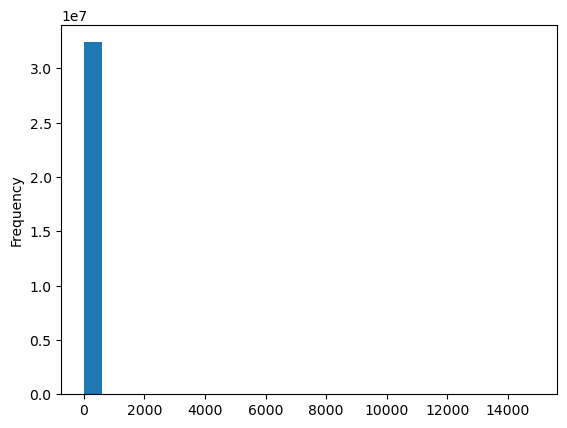

In [9]:
#create a histogram of prices
df['prices'].plot.hist(bins = 25)

In [10]:
df['prices'].describe()

count    3.240416e+07
mean     9.825785e+00
std      1.740981e+02
min      1.000000e+00
25%      4.199219e+00
50%      7.398438e+00
75%      1.129688e+01
max      1.489600e+04
Name: prices, dtype: float64

In [11]:
df['prices'].mean()

9.825785349058837

In [12]:
df['prices'].median()

7.3984375

In [13]:
df['prices'].max()

14896.0

C:\users\jacob\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\users\jacob\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='prices', ylabel='prices'>

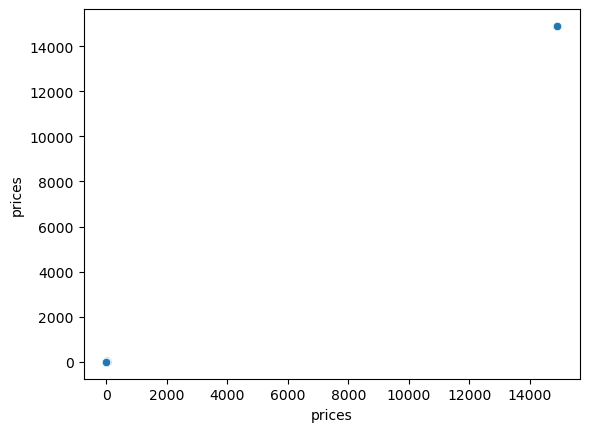

In [14]:
sns.scatterplot(x = 'prices', y = 'prices',data = df)

### data quality check

In [15]:
df.loc[df['prices'] > 100]

,order_id,user_id,order_number,day_of_week,hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,_merge,busiest_day,busyness,busiest_period_of_day,max_order,loyalty_flag,avg_price,spender_flag,median_days_since_prior_order,frequency_flag
10030345,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,...,both,Regularly busy,Regular days,Most orders,40,Regular Customer,NaN,NaN,NaN,NaN
10030346,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,both,Regularly busy,Regular days,Most orders,40,Regular Customer,NaN,NaN,NaN,NaN
10030347,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,...,both,Regularly busy,Regular days,Average orders,4,New Customer,NaN,NaN,NaN,NaN
10030348,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,both,Busiest day,Busiest days,Average orders,4,New Customer,NaN,NaN,NaN,NaN
10030349,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,...,both,Regularly busy,Busiest days,Average orders,16,Regular Customer,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10034769,3172853,205650,18,1,9,7.0,21553,17,1,Lowfat 2% Milkfat Cottage Cheese,...,both,Regularly busy,Busiest days,Most orders,25,Regular Customer,NaN,NaN,NaN,NaN
10034770,2504315,205818,3,5,15,3.0,21553,13,0,Lowfat 2% Milkfat Cottage Cheese,...,both,Regularly busy,Regular days,Most orders,25,Regular Customer,NaN,NaN,NaN,NaN
10034771,1108388,205818,5,4,5,1.0,21553,5,1,Lowfat 2% Milkfat Cottage Cheese,...,both,Least busy,Slowest days,Least orders,25,Regular Customer,NaN,NaN,NaN,NaN
10034772,1916142,206049,1,2,17,NaN,21553,2,0,Lowfat 2% Milkfat Cottage Cheese,...,both,Regularly busy,Regular days,Average orders,5,New Customer,NaN,NaN,NaN,NaN


In [16]:
df.loc[df['prices'] > 100, 'prices'] = np.nan

In [17]:
df['prices'].max()

25.0

### histograms

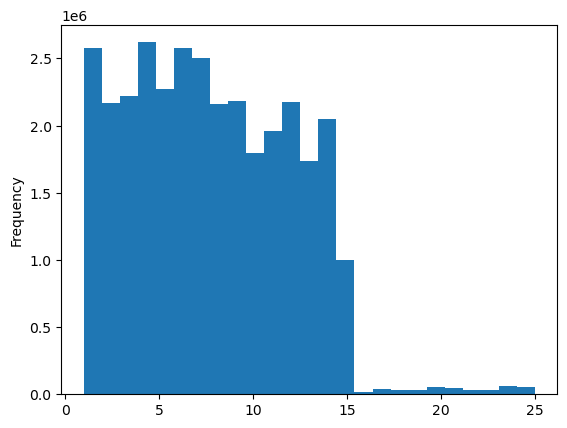

In [18]:
#create histogram
hist = df['prices'].plot.hist(bins = 25)

In [19]:
#export histogram
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices.png'))

### creating a sample

In [20]:
#create a list holding t/f values to test np.random.rand() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [21]:
dev

array([False,  True, False, ...,  True,  True, False])

In [22]:
np.random.rand(10)

array([0.15311818, 0.81786511, 0.20691209, 0.46877994, 0.64491806,
       0.17090853, 0.00833434, 0.18474633, 0.63848856, 0.5795878 ])

In [23]:
#store 70% of the sample in the dataframe big
big = df[dev]

In [24]:
#store 30% of the sample in the data frame small
small = df[~dev]

In [25]:
#check output
len(df)

32404161

In [26]:
#check output
len(big) + len(small)

32404161

In [27]:
df_2 = small[['day_of_week', 'prices']]

### create a line chart

C:\users\jacob\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\users\jacob\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\users\jacob\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\users\jacob\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

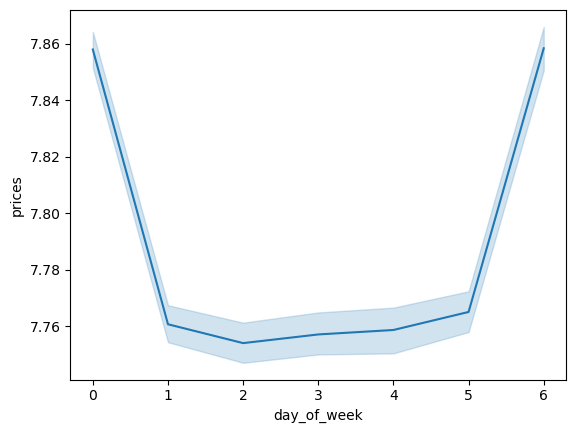

In [28]:
line = sns.lineplot(data = df_2, x = 'day_of_week', y = 'prices')

In [29]:
#export line chart
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_prices_day_of_week.png'))

In [30]:
#export additional cleaned data orders_prods merged
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged.pkl'))